In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
%cd /content/drive/MyDrive/Projects/NepSense/Prashant/Name Gender Detection

/content/drive/MyDrive/Projects/NepSense/Prashant/Name Gender Detection


In [22]:
file_name="dataset_facebook-comments-scraper_2024-05-11_14-36-19-904.csv"
fb_data_path=f"/content/drive/MyDrive/Projects/NepSenseDatas/Scrapped/{file_name}"

In [23]:
import pandas as pd

# Load boys' names and girls' names from Excel files
boys_names_df = pd.read_csv("./Gender Datas/Boys Names Nepali + Indian - Names.csv")
girls_names_df = pd.read_csv("./Gender Datas/Girl Name Nepali + Indian - Sheet1.csv")
voter_girls_names_df = pd.read_csv("./Gender Datas/voter_dataset_female.csv")
voter_boys_names_df = pd.read_csv("./Gender Datas/voter_dataset_male.csv")

In [24]:
# Extract only the "Name" column and remove rows with missing values
boys_names_df = boys_names_df[["Name"]]
boys_names_df = boys_names_df.dropna()

# Assign a gender label (1 for boys)
boys_names_df = boys_names_df.assign(Gender=1)

# Split names separated by ';' or '/' and explode into multiple rows
boys_names_df['Name'] = boys_names_df['Name'].str.replace(';', ',').replace('/', ',').str.split(',')
boys_names_df = boys_names_df.explode('Name')

# Assign a gender label (1 for boys)
boys_names_df = boys_names_df.assign(Gender=1)
boys_names_df.head()

,Name,Gender
0,Aabishkar,1
1,Aadarsh,1
2,Aadarsh,1
2,Aaadarsh,1
3,Aadesh,1


In [25]:
# For girls' names
girls_names_df = girls_names_df[["Name"]]
girls_names_df = girls_names_df.dropna()

# Split names separated by ';' or '/' and explode into multiple rows
girls_names_df['Name'] = girls_names_df['Name'].str.replace(';', ',').replace('/', ',').str.split(',')
girls_names_df = girls_names_df.explode('Name')

# Assign a gender label (0 for girls)
girls_names_df = girls_names_df.assign(Gender=0)
girls_names_df.head()

,Name,Gender
0,Aanchal/Anchal,0
1,Aapti,0
2,Aarati/Arati,0
3,Aastha/Astha,0
4,Aayushi/Ayushi,0


In [26]:
voter_boys_names_df.rename(columns={'First_Name': 'Name'}, inplace=True)
voter_boys_names_df = voter_boys_names_df[["Name","Gender"]]
voter_boys_names_df

,Name,Gender
0,Agam,1
1,Ajay,1
2,Anil,1
3,Anish,1
4,Anis,1
...,...,...
187083,Singu,1
187084,Harawanta,1
187085,Kadda,1
187086,Nardish,1


In [27]:
voter_girls_names_df.rename(columns={'First_Name': 'Name'}, inplace=True)
voter_girls_names_df = voter_girls_names_df[["Name","Gender"]]
voter_girls_names_df

,Name,Gender
0,Anjana,0
1,Anju,0
2,Anita,0
3,Anu,0
4,Anupa,0
...,...,...
190862,Biladho,0
190863,Manahodar,0
190864,Maiyamoti,0
190865,Sikhama,0


In [28]:
# Concatenate boys' and girls' names into one DataFrame
combined_df = pd.concat([boys_names_df, girls_names_df,voter_boys_names_df,voter_girls_names_df], ignore_index=True)

# Remove rows with missing values (NaN) in the "Name" column
combined_df = combined_df.dropna(subset=['Name'])

# Remove duplicate rows based on the "Name" column
combined_df = combined_df.drop_duplicates(subset=['Name'], keep='first')

# Reset index
combined_df = combined_df.reset_index(drop=True)

# Display the combined DataFrame
combined_df

,Name,Gender
0,Aabishkar,1
1,Aadarsh,1
2,Aaadarsh,1
3,Aadesh,1
4,Aadhin,1
...,...,...
381574,Biladho,0
381575,Manahodar,0
381576,Maiyamoti,0
381577,Sikhama,0


In [34]:
combined_df.to_csv("./Gender Datas/Combined Gender Datas.csv",index=False)

In [ ]:
# Function to get gender based on name input
def get_gender_from_name(name):
    if ' ' in name:
        name = name.split(maxsplit=1)[0].capitalize()
    else:
        name = name.capitalize()
    gender = combined_df[combined_df['Name'] == name]['Gender'].values
    if len(gender) > 0:
        return gender[0]
    else:
        return 'Unknown'


In [ ]:
# # Get input from user
# name_input = input("Enter a name: ")

# # Get gender based on input
# gender_output = get_gender_from_name(name_input)

# # Output the result
# print(f"The gender of '{name_input}' is: {gender_output}")

In [ ]:
dataset_facebook_comments = pd.read_csv(fb_data_path)
dataset_facebook_comments.head()

,attachments/0/style_list/0,attachments/0/style_list/1,attachments/0/style_list/2,attachments/0/style_list/3,attachments/0/style_list/4,commentUrl,commentsCount,date,facebookId,facebookUrl,...,pageAdLibrary/id,pageAdLibrary/is_business_page_active,postTitle,profileId,profileName,profilePicture,profileUrl,replyToCommentId,text,threadingDepth
0,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/officialroutineofnepa...,104.0,2022-02-24T04:07:17.000Z,5923416467691097,https://www.facebook.com/officialroutineofnepa...,...,213613352004799,False,After huge controversy and Rape Case against h...,100016280255916,Sumnima Karki,https://scontent-lax3-2.xx.fbcdn.net/v/t39.308...,https://www.facebook.com/sumnima.karki.25,NaN,दुर्गेश थापा लाई singer भनेको आरोप मा Routine ...,NaN
1,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/officialroutineofnepa...,16.0,2022-02-24T06:21:07.000Z,5923416467691097,https://www.facebook.com/officialroutineofnepa...,...,213613352004799,False,After huge controversy and Rape Case against h...,pfbid0QJcTaCVA1fn5tZ5Pdpkra7PTg6Ki1pbcFHHzZwSA...,PA RU,https://scontent-lax3-2.xx.fbcdn.net/v/t39.308...,https://www.facebook.com/parbatikumal.4,NaN,90% Of फेसबुके are now searching Durgesh Thapa...,NaN
2,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/officialroutineofnepa...,5.0,2022-02-24T03:19:25.000Z,5923416467691097,https://www.facebook.com/officialroutineofnepa...,...,213613352004799,False,After huge controversy and Rape Case against h...,pfbid02yxjxJRqMLuXwzrmADZkxLaJGAngpsZ9HsRNXojQ...,Anisha Panday Upreti,https://scontent-lax3-2.xx.fbcdn.net/v/t39.308...,https://www.facebook.com/anisha.panday.5,NaN,मेरो देश डुब्न लाग्यो किनारा लगाइदेउ😔जय नेपाल ...,NaN
3,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/officialroutineofnepa...,3.0,2022-02-24T05:16:04.000Z,5923416467691097,https://www.facebook.com/officialroutineofnepa...,...,213613352004799,False,After huge controversy and Rape Case against h...,100010191914399,Chadanee Nepal,https://scontent-lax3-1.xx.fbcdn.net/v/t39.308...,https://www.facebook.com/chandani.nepal.56,NaN,लौ न दुर्गेश थापालाई मन्त्री आलेले ठाउको ठाउँ ...,NaN
4,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/officialroutineofnepa...,3.0,2022-02-24T04:12:22.000Z,5923416467691097,https://www.facebook.com/officialroutineofnepa...,...,213613352004799,False,After huge controversy and Rape Case against h...,pfbid02cgSyqspWuqy4KdLwutmWGneEBWRHYFcay2Y5YPo...,Bibek,https://scontent-lax3-1.xx.fbcdn.net/v/t39.308...,NaN,NaN,"Truth be told, justice should be done, the cul...",NaN


In [ ]:
!pwd

/content/drive/MyDrive/Projects/NepSense/Prashant/Gender Guesser


In [ ]:
# %pip install nepali-to-roman
# %pip install langdetect
import re
from langdetect import detect
import ntr

def capitalize_after_space(name):
    words = name.split()
    capitalized_words = [word.capitalize() for word in words]
    return ' '.join(capitalized_words)

def detect_nep_and_coversion(text):
      # Ensure that text is a string or convert it to a string if it's not
  if not isinstance(text, str):
      text = str(text)
  sentences = re.split(r'(?<=[.!?])\s+(?=\D)', text)
  english_comments = []
  for sentence in sentences:
      try:
          language = detect(sentence)
          if language == "ne":
            sentence=capitalize_after_space(ntr.nep_to_rom(sentence))
            english_comments.append(sentence)
          else:
            english_comments.append(sentence)
      except:
          pass
  filtered_comment = '.'.join(english_comments)
  return filtered_comment


dataset_facebook_comments["English Coversion"] = dataset_facebook_comments["profileName"].apply(detect_nep_and_coversion)
dataset_facebook_comments

,attachments/0/style_list/0,attachments/0/style_list/1,attachments/0/style_list/2,attachments/0/style_list/3,attachments/0/style_list/4,commentUrl,commentsCount,date,facebookId,facebookUrl,...,pageAdLibrary/is_business_page_active,postTitle,profileId,profileName,profilePicture,profileUrl,replyToCommentId,text,threadingDepth,English Coversion
0,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/officialroutineofnepa...,104.0,2022-02-24T04:07:17.000Z,5923416467691097,https://www.facebook.com/officialroutineofnepa...,...,False,After huge controversy and Rape Case against h...,100016280255916,Sumnima Karki,https://scontent-lax3-2.xx.fbcdn.net/v/t39.308...,https://www.facebook.com/sumnima.karki.25,NaN,दुर्गेश थापा लाई singer भनेको आरोप मा Routine ...,NaN,Sumnima Karki
1,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/officialroutineofnepa...,16.0,2022-02-24T06:21:07.000Z,5923416467691097,https://www.facebook.com/officialroutineofnepa...,...,False,After huge controversy and Rape Case against h...,pfbid0QJcTaCVA1fn5tZ5Pdpkra7PTg6Ki1pbcFHHzZwSA...,PA RU,https://scontent-lax3-2.xx.fbcdn.net/v/t39.308...,https://www.facebook.com/parbatikumal.4,NaN,90% Of फेसबुके are now searching Durgesh Thapa...,NaN,PA RU
2,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/officialroutineofnepa...,5.0,2022-02-24T03:19:25.000Z,5923416467691097,https://www.facebook.com/officialroutineofnepa...,...,False,After huge controversy and Rape Case against h...,pfbid02yxjxJRqMLuXwzrmADZkxLaJGAngpsZ9HsRNXojQ...,Anisha Panday Upreti,https://scontent-lax3-2.xx.fbcdn.net/v/t39.308...,https://www.facebook.com/anisha.panday.5,NaN,मेरो देश डुब्न लाग्यो किनारा लगाइदेउ😔जय नेपाल ...,NaN,Anisha Panday Upreti
3,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/officialroutineofnepa...,3.0,2022-02-24T05:16:04.000Z,5923416467691097,https://www.facebook.com/officialroutineofnepa...,...,False,After huge controversy and Rape Case against h...,100010191914399,Chadanee Nepal,https://scontent-lax3-1.xx.fbcdn.net/v/t39.308...,https://www.facebook.com/chandani.nepal.56,NaN,लौ न दुर्गेश थापालाई मन्त्री आलेले ठाउको ठाउँ ...,NaN,Chadanee Nepal
4,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/officialroutineofnepa...,3.0,2022-02-24T04:12:22.000Z,5923416467691097,https://www.facebook.com/officialroutineofnepa...,...,False,After huge controversy and Rape Case against h...,pfbid02cgSyqspWuqy4KdLwutmWGneEBWRHYFcay2Y5YPo...,Bibek,https://scontent-lax3-1.xx.fbcdn.net/v/t39.308...,NaN,NaN,"Truth be told, justice should be done, the cul...",NaN,Bibek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/officialroutineofnepa...,NaN,2022-02-24T04:02:18.000Z,5923416467691097,https://www.facebook.com/officialroutineofnepa...,...,False,After huge controversy and Rape Case against h...,pfbid02oL2obxr2qt6VFQbn27LZGFRAwqVYM62b67AbSR9...,शिरा पराजुली,https://scontent-mia3-1.xx.fbcdn.net/v/t39.308...,NaN,Y29tbWVudDo1OTIzNDE2NDY3NjkxMDk3XzU5MjM0MjU0Mz...,समय अधिकारी अनुभवी त खत्रा होनि तर अहिले परेर ...,2.0,Shira Parajuli
938,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/officialroutineofnepa...,4.0,2022-02-24T03:18:14.000Z,5923416467691097,https://www.facebook.com/officialroutineofnepa...,...,False,After huge controversy and Rape Case against h...,pfbid02kBeiKWSQTqVvFxeBAPMJxZM9Js74PmSo9L4RQVQ...,समय अधिकारी,https://scontent-mia3-1.xx.fbcdn.net/v/t39.308...,NaN,Y29tbWVudDo1OTIzNDE2NDY3NjkxMDk3XzU5MjM0MjU0Mz...,शिरा पराजुली अनुभवीको कुरा,1.0,Samay Adhikari
939,NaN,NaN,NaN,NaN,NaN,https://www.facebook.com/officialroutineofnepa...,NaN,2022-02-24T12:47:23.000Z,5923416467691097,https://www.facebook.com/officialroutineofnepa...,...,False,After huge controversy and Rape Case against h...,pfbid0mVSitcmG2L3FPBh6ii3iW7pxtX9K9eF32ny1Qjxi...,Sush Bin,https://scontent.fknu1-6.fna.fbcdn.net/v/t39.3...,NaN,Y29tbWVudDo1OTIzNDE2NDY3NjkxMDk3XzYyNDI4NDAzNT...,Abhishek Rai Geet bata name kamayena aba kama...,2.0,Sush Bin
940,NaN,NaN,NaN,NaN,NaN,https://www.facebook

In [ ]:
dataset_facebook_comments["NameDetection"]=dataset_facebook_comments["English Coversion"].apply(get_gender_from_name)
dataset_facebook_comments[["English Coversion","NameDetection"]]

,English Coversion,NameDetection
0,Sumnima Karki,0
1,PA RU,0
2,Anisha Panday Upreti,0
3,Chadanee Nepal,Unknown
4,Bibek,1
...,...,...
937,Shira Parajuli,0
938,Samay Adhikari,1
939,Sush Bin,1
940,Abhishek Rai,1


In [ ]:
dataset_facebook_comments["NameDetection"].value_counts()

NameDetection
1          458
0          262
Unknown    222
Name: count, dtype: int64

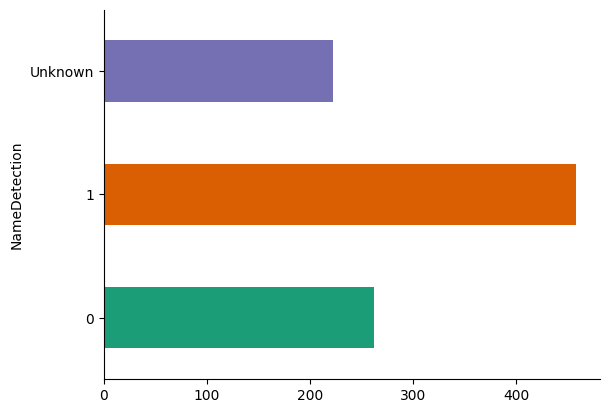

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
dataset_facebook_comments.groupby('NameDetection').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Assuming "dataset_facebook_comments" is your DataFrame
unknown_names_df = dataset_facebook_comments[dataset_facebook_comments["NameDetection"] == "Unknown"]

# Selecting only the "profileName" and "NameDetection" columns
unknown_names_df = unknown_names_df[["profileName", "NameDetection"]]

# Displaying the filtered DataFrame
unknown_names_df


,profileName,NameDetection
3,Chadanee Nepal,Unknown
5,अरुणा भुजेल,Unknown
15,राधिका बेल्वासे,Unknown
17,Shriya Bhat Chhetri,Unknown
20,Anny Rai,Unknown
...,...,...
924,Januvi Poudel,Unknown
926,NiruCa Karkee,Unknown
927,NiruCa Karkee,Unknown
929,NiruCa Karkee,Unknown


In [ ]:
dataset_facebook_comments.to_csv(fb_data_path, index=False)